# IDENTIFICACIÓN DE SISTEMAS

Profesor: Jairo Alberto Cuéllar Guarnizo  
Programa: Ingeniería en Automatización y Control

In [2]:
from sympy import MatrixSymbol, Matrix, Identity

import sympy as sym
import pandas as pd
import math

sym.init_printing()
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import control
import random

# Métodos paramétricos de Identificación

## Recapitulando

Para el siguiente modelo lineal que se pretende identificar:

$$y[k] = \phi[k]\theta + \varepsilon[k]$$

Se tiene que: $y[k]$ son valores medidos de la salida (señal capturada) y los parámetros a Identificar son $\theta$, asumiendo que se pretende minimizar $\varepsilon$ por tanto la función de costo a minimizar sería:

$$f(\theta_{LS}) = \frac{1}{2}|y_N - \phi_N\theta|^2$$

$\phi_N$ es la matriz de regresión que su estructura depende generalmente de la entrada, sus derivadas y de las derivadas de la salida y se estructura según la aproximación que se quiera hacer. 

Hasta el momento sin tener la medición, lo que se ha hecho es partir de un modelo conocido y contaminarlo con un ruido de media 0.

$$y_N = y_I + e_N$$

Donde $y_I$ es el **valor ideal** y $e_N$ un error de medición.

Entonces el modelo estimado será:

$$y_e = \phi.\theta_{LS}$$

Donde $\theta_{LS} = \phi^+.y_N$, además se tendría que:

$$\phi^+ = (\phi^T.\phi)^{-1}\phi^T$$


## Mínimos cuadrados con Pesos (WLS)

Incluyendo pesos la función de costo a minimizar es:

$$f(\theta_{WLS}) = \frac{1}{2}|y_N - \phi_N\theta|^2.W$$ Reeescribiendo la ecuación tendríamos:

$$f(\theta_{WLS}) = \frac{1}{2}|\tilde{y_N} - \tilde{\phi_N}\theta_{WLS}|^2$$

Donde la matriz W es una matriz diagonal con pesos (varianzas) en la diagonal principal. El modelo identificado estaría dado por:

$$y_e = \tilde\phi.\theta_{WLS}$$

Además:

$$\theta_{WLS} = \tilde{\phi^+}.\tilde{y_N}$$

Tener en cuenta que:

$$\tilde{\phi} = W^{1/2}.\phi$$
$$\tilde{y_N} = W^{1/2}.y_N$$

(array([[1.0487041, 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 1.0487041, 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 1.0487041, ..., 0.       , 0.       ,
         0.       ],
        ...,
        [0.       , 0.       , 0.       , ..., 1.0487041, 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 1.0487041,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         1.0487041]]),
 50)

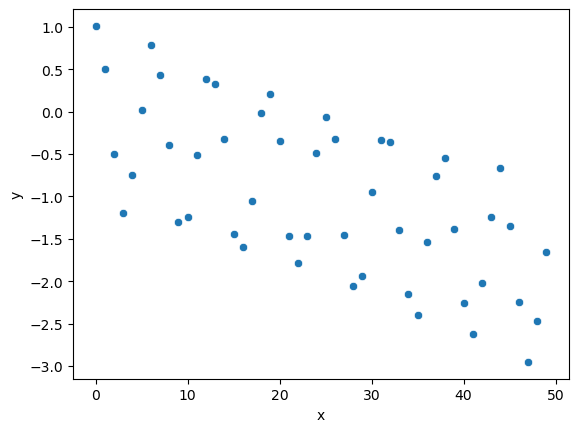

In [5]:
datos = pd.read_csv ('data\data01.csv')
sns.scatterplot(datos,x ='x',y = 'y')
N = np.size(datos.x)
var = math.sqrt(1/datos.y.var())
_W = np.eye(N)*var
_W, N


In [17]:
### Definiendo phi según SU Hipótesis
### INCLUYENDO NO LINEALIDADES EN EL REGRESOR

##phi = np.array([np.sin(datos.x),np.cos(datos.x), datos.x, np.ones(N)]).transpose()
phi = np.array([np.cos(datos.x), datos.x**3,datos.x**2, datos.x, np.ones(N)]).transpose()

_phi = np.dot(_W,phi)
A = np.dot(_phi.transpose(),_phi)
Mpr = np.linalg.inv(A)

_phi

array([[ 1.04870410e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.04870410e+00],
       [ 5.66617244e-01,  1.04870410e+00,  1.04870410e+00,
         1.04870410e+00,  1.04870410e+00],
       [-4.36414894e-01,  8.38963281e+00,  4.19481641e+00,
         2.09740820e+00,  1.04870410e+00],
       [-1.03820919e+00,  2.83150107e+01,  9.43833692e+00,
         3.14611231e+00,  1.04870410e+00],
       [-6.85478746e-01,  6.71170625e+01,  1.67792656e+01,
         4.19481641e+00,  1.04870410e+00],
       [ 2.97477697e-01,  1.31088013e+02,  2.62176025e+01,
         5.24352051e+00,  1.04870410e+00],
       [ 1.00693452e+00,  2.26520086e+02,  3.77533477e+01,
         6.29222461e+00,  1.04870410e+00],
       [ 7.90620386e-01,  3.59705507e+02,  5.13865010e+01,
         7.34092871e+00,  1.04870410e+00],
       [-1.52586482e-01,  5.36936500e+02,  6.71170625e+01,
         8.38963281e+00,  1.04870410e+00],
       [-9.55506043e-01,  7.64505290e+02,  8.49450322e+01,
         9.43833692e+00

In [18]:
#Obteniendo la matriz de estimadores
B = np.dot(_phi.transpose(),datos.y)
theta = np.dot(Mpr,B)
theta

array([ 9.62302210e-01,  1.93138629e-08, -3.18773211e-06, -3.78374944e-02,
       -7.72003489e-03])

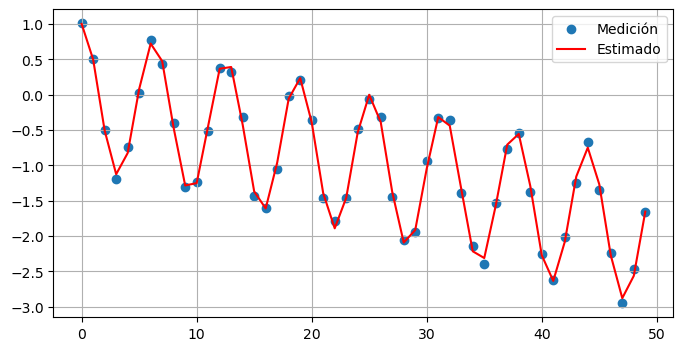

In [21]:
#y_e = np.polyval(np.flip(theta),datos.x) 
#y_e = theta[0]*np.sin(datos.x)+theta[1]*np.cos(datos.x)+theta[2]*datos.x+theta[3]
y_e = np.dot(_phi,theta);
#y_e = theta[0]*datos.x**3+theta[1]*datos.x**2+theta[2]*datos.x+theta[3]
## Graficando Las 2 funciones

plt.figure(figsize=(8,4))
plt.scatter(datos.x,datos.y)
plt.plot(datos.x,y_e, color = "red")

plt.legend(["Medición","Estimado"])
plt.grid()

In [22]:
## Calculando ECM y R^2

e = datos.y - y_e

ECM = np.dot(e.transpose(),e)/N

R2 = 1 - (np.dot(e.transpose(),e))/(np.dot(datos.y.transpose(),datos.y))

ECM, R2